# Interactions

The `interact` function `(panel.interact)` automatically creates controls for interactively browsing code and data.

In [1]:
import panel as pn
from panel import widgets
from panel.interact import fixed, interact, interact_manual, interactive

pn.extension()

## `interact`

At the simplest level, `interact` controls are automatically generated for function arguments, and the function is then called with those arguments when you interactively edit the controls. To use `interact` you need to define a function that you want to examine. Here is a function that returns the only argument: `x`.

In [2]:
def f(x):
    return x

If you pass this function as the first argument together with an integer keyword argument `x=10` to `interact` a slider is generated and bound to the function parameters.

In [3]:
interact(f, x=10)

Column
    [0] Column
        [0] IntSlider(end=30, name='x', start=-10, value=10)
    [1] Row
        [0] Str(int, name='interactive00006')

If you move the slider, the function is called, which outputs the current value of `x`.
If you pass `True` or `False` `interact` generates a check box:

In [4]:
interact(f, x=True)

Column
    [0] Column
        [0] Checkbox(name='x', value=True)
    [1] Row
        [0] Str(bool, name='interactive00018')

When you pass a string, `interact` generates a text area.

In [5]:
interact(f, x='Hi Pythonistas!')

Column
    [0] Column
        [0] TextInput(name='x', value='Hi Pythonistas!')
    [1] Row
        [0] Markdown(str, name='interactive00030')

`interact` can also be used as a *Decorator*. In this way you can define a function as well as determine the type of interaction. As the following example shows, `interact` works also with functions that have multiple arguments.

In [6]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)


g

Column
    [0] Column
        [0] Checkbox(name='x', value=True)
        [1] FloatSlider(end=3.0, name='y', start=-1.0, value=1.0)
    [1] Row
        [0] Str(tuple, name='interactive00042')

## Layout of interactive widgets

The `interact` function returns a panel that contains the widgets and the display output. By indexing these panels we can lay out the objects exactly how we want:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

def mplplot(df, **kwargs):
    fig = df.plot().get_figure()
    plt.close(fig)
    return fig

def sine(frequency=1.0, amplitude=1.0, n=200, view_fn=mplplot):
    xs = np.arange(n)/n*20.0
    ys = amplitude*np.sin(frequency*xs)
    df = pd.DataFrame(dict(y=ys), index=xs)
    return view_fn(df, frequency=frequency, amplitude=amplitude, n=n)

Row
    [0] Matplotlib(Figure, name='interactive00056')
    [1] Column
        [0] Markdown(str)
        [1] FloatSlider(end=3.0, name='frequency', start=-1.0, value=1.0)
        [2] FloatSlider(end=3.0, name='amplitude', start=-1.0, value=1.0)
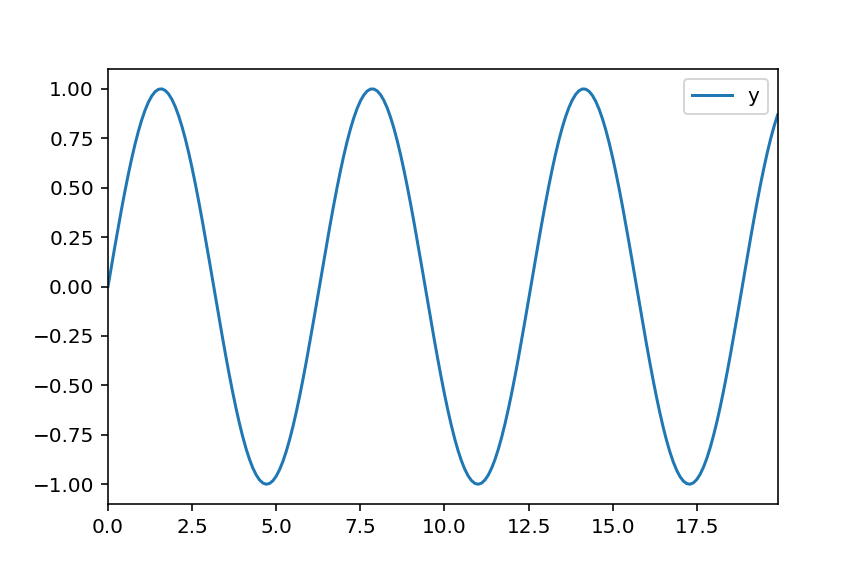

In [8]:
i = pn.interact(sine, n=(5, 100))
pn.Row(i[1][0], pn.Column("<br>\n### Sine waves", i[0][0], i[0][1]))

In [9]:
layout = interact(f, x=10)

pn.Column('**A custom interact layout**', pn.Row(layout[0], layout[1]))

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] IntSlider(end=30, name='x', start=-10, value=10)
        [1] Row
            [0] Str(int, name='interactive00075')

## Set arguments with `fixed`

There may be times when you want to examine a function using `interact`, but want to set one or more of its arguments to specific values. This can be achieved using the `fixed` function:

In [10]:
def h(p, q):
    return (p, q)

In [11]:
interact(h, p=5, q=fixed(20))

Column
    [0] Column
        [0] IntSlider(end=15, name='p', start=-5, value=5)
    [1] Row
        [0] Str(tuple, name='interactive00093')

## *Widget abbreviations*

If you pass certain values, `interact` use automatically the appropriate widget, e.g. a checkbox for `True` or `IntSlider` for integer values. So you don’t have to explicitly specify the appropriate widget:

In [12]:
interact(f, x=widgets.FloatSlider(start=0.0,end=10.0,step=0.01,value=3.0))

Column
    [0] Column
        [0] FloatSlider(end=10.0, start=0.0, step=0.01, value=3.0)
    [1] Row
        [0] Str(float, name='interactive00106')

In [13]:
interact(f, x=(0.0,10.0,0.01,3.0))

Column
    [0] Column
        [0] FloatSlider(end=10.0, name='x', start=0.0, step=0.01, value=3.0)
    [1] Row
        [0] Str(float, name='interactive00117')

This example shows how the keyword arguments are processed by `interact`:

1. If the keyword argument is an instance of `Widget` with an `value` attribute, this widget is used. Any widget with an `value` attribute can be used, including custom ones.
2. Otherwise, the value is treated as a *Widget Abbreviation* that is converted to a widget before use.

The following table gives an overview of the various *Widget Abbreviations*:

| Keyword argument                                    | Widget        |
|:----------------------------------------------------|:--------------|
| `True` or `False`                                   | `Checkbox`    |
| `'Hi Pythonistas!'`                                 | `Text`        |
| Integer value as `min`, `max`,`step`, `value`       | `IntSlider`   |
| Floating-point `min`, `max`,`step`, `value`         | `FloatSlider` |
| `['apple','pear']` or `{'one':1,'two':2}`           | `Dropdown`    |